In [37]:
import pandas as pd          # for data handling
import numpy as np           # for numerical operations
from sklearn.ensemble import RandomForestRegressor  # the model
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.metrics import mean_squared_error, r2_score  # evaluation
import kagglehub  # for dataset access
from sklearn.tree import plot_tree  #visualiztion
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv(kagglehub.dataset_download("rohitgrewal/airlines-flights-data")+"/airlines_flights_data.csv") #load the dataset
print(df.head()) #view the dataset

   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [39]:
#Preprocessing
#One hot encoding is needed to convert datasets into categorical values
df = pd.get_dummies(df, columns=["airline", "source_city", "destination_city", "arrival_time", "departure_time", "class", "stops"], drop_first=True)
df.drop(columns=["flight"], inplace=True)  # drop unnecessary columns
df.dropna(inplace=True)  # drop rows with missing values
df.drop_duplicates(inplace=True)  # drop duplicate rows

In [40]:
#Split the data into features and target
X = df.drop(columns=["price"])
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

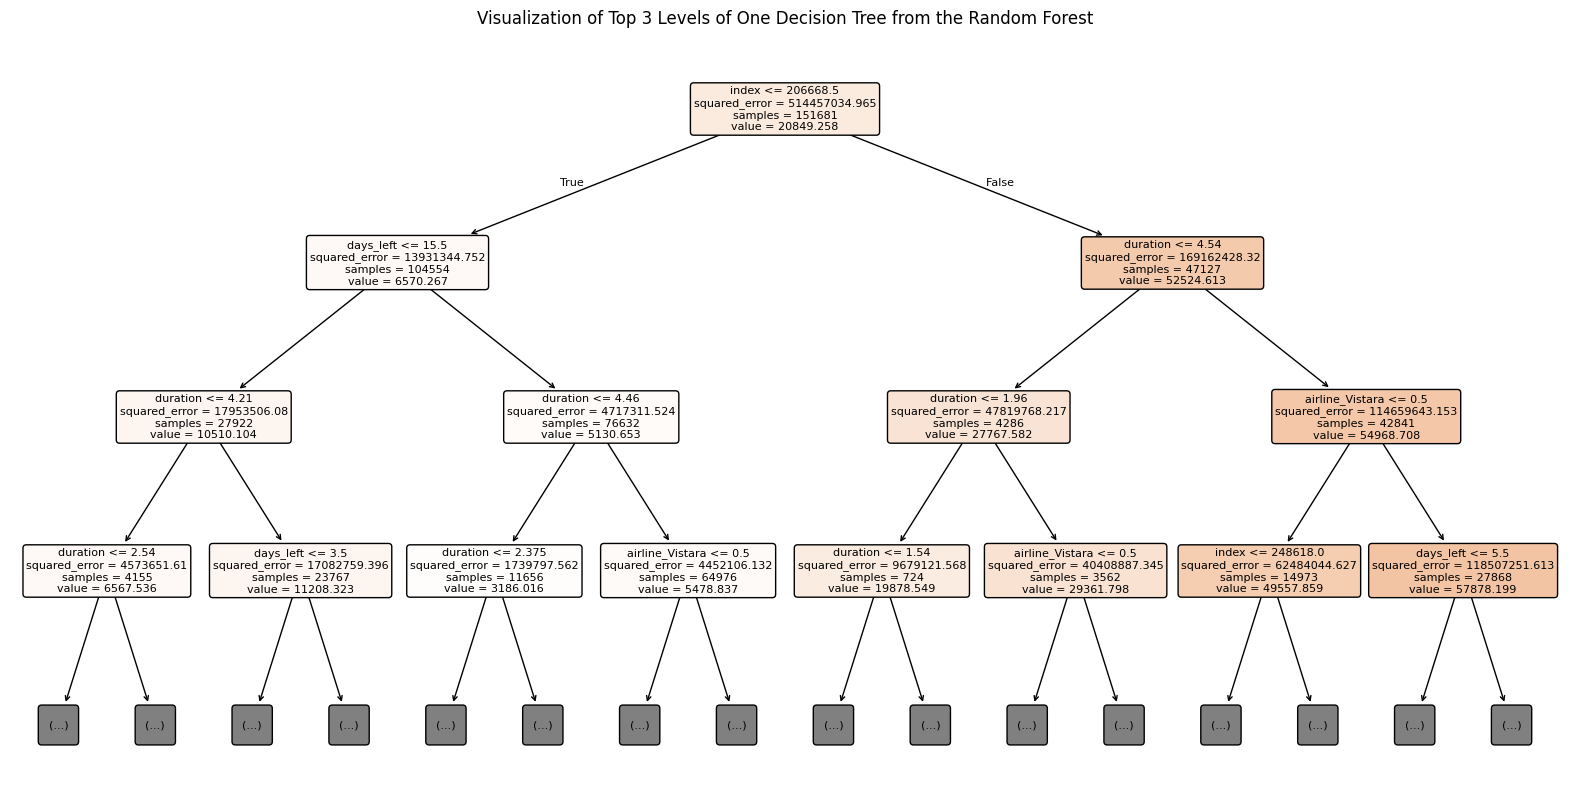

In [41]:
#Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Visualize only the top 3 levels of one tree from the random forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=8, max_depth=3)
plt.title('Visualization of Top 3 Levels of One Decision Tree from the Random Forest')
plt.show()

### Understanding the Decision Tree Plot Labels
- **feature_name <= threshold**: The decision rule at this node. If true, go left; if false, go right.
- **samples**: Number of training samples reaching this node.
- **value**: The average target value (predicted price) for samples at this node.
- **squared_error**: The sum of squared differences between the actual and predicted values for samples at this node (a measure of node impurity).
- **index**: The unique identifier for this node in the tree.

In [42]:
#Test the model
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 6187395.889030649
R^2 Score: 0.9879968794150902


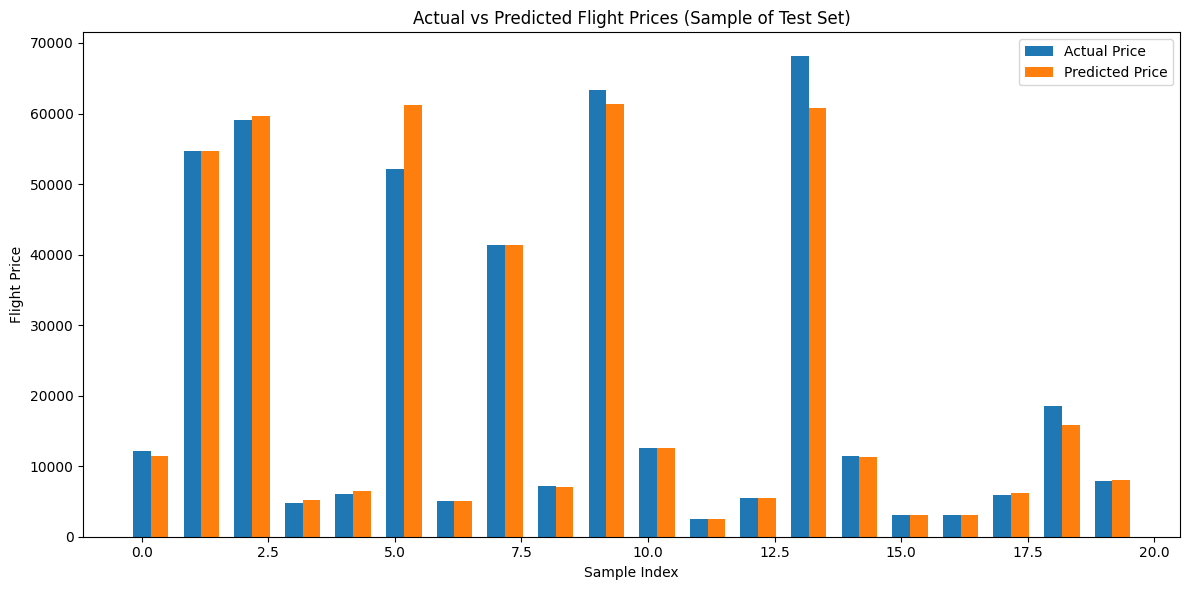

In [43]:
# Visualize model performance: Actual vs Predicted Prices (Bar Plot)
import numpy as np
import matplotlib.pyplot as plt

# Select a random sample of 20 predictions for visualization
np.random.seed(42)
sample_indices = np.random.choice(len(y_test), size=20, replace=False)
actual_sample = y_test.iloc[sample_indices].values
predicted_sample = y_pred[sample_indices]

plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(actual_sample))
plt.bar(indices, actual_sample, bar_width, label='Actual Price')
plt.bar(indices + bar_width, predicted_sample, bar_width, label='Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Flight Price')
plt.title('Actual vs Predicted Flight Prices (Sample of Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Display the original feature values for each test sample shown in the bar plot
# Map back to original categorical values for interpretability
original_test_indices = X_test.iloc[sample_indices].index
original_samples = df.loc[original_test_indices].copy()
original_samples['Actual Price'] = actual_sample
original_samples['Predicted Price'] = predicted_sample
original_samples.reset_index(drop=True, inplace=True)
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
display(original_samples)

,index,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,class_Economy,stops_two_or_more,stops_zero,Actual Price,Predicted Price
0,861,12.67,6,12150,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,12150,11398.21
1,251561,8.83,35,54684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,54684,54684.00
2,229142,8.75,41,59021,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,59021,59625.80
3,91846,12.00,39,4796,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,4796,5139.15
4,59659,28.92,39,6116,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,6116,6432.55
5,270427,9.83,6,52175,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,52175,61157.59
6,131589,14.75,27,5102,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,5102,5092.67
7,285925,27.33,15,41314,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,41314,41314.00
8,170096,12.00,44,7196,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,7196,7034.10
9,281191,15.25,18,63277,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,63277,61372.89
